## Recidivism Data Mining and Prediction
#### by Eric Gustin and Daniel Hoberman
#### (CPSC 322, Spring 2022)

### Introduction
1. Dataset Description
    1. The dataset reports if an offender returns to prison in a 3 year span after being released from an Iowa prison
    1. These attributes include:
        1. Sex
        1. Race
        1. Offense Type
        1. Age at release
        1. Main supervising district
        1. Release type
1. Classification goals
    1. We are hoping to be ably to accurately predict if an offender will return to prison or not based on the different attributes in the dataset
1. Findings:
    1. We used Naive Bayes, Decision Trees, and Random Forest for our classification. We found that Random Forest had the best classification results. ? Not sure


### Data Analysis
1. More in depth Dataset Information
    1. Fiscal Year Released(Number)
    1. Recidivism Reporting Year (Number)
    1. Main Supervising District (string)
    1. Release Type (string)
    1. Race - Ethnicity (string)
    1. Age At Release (string)
    1. Sex (string)
    1. Offense Classification (string)
    1. Offense Type (string)
    1. Offense subtype (string)
    1. Return to Prison (string)
    1. Days to Return (number)
    1. Recidivism type (string)
    1. New Offense Classification (string)
    1. New Offense Type (string)
    1. New Offense Sub Type (string)
    1. target population (string)
        1. We removed many of these attributes as they weren't useful for our prediction
        1. We also cleaned and fixed the dataset for best data mining purposes
1. Summary Statistics
    1. Around 30% of prisoners return to prison
    1. Males are 6 times more likely to be in an Iowa prison
    1. 60% white, 15% black, 25% other ethnicities
    1. Majority of prisoners are 25-34 years old at release age.

### Useful Diagrams for data insight

In [145]:
import os
from mysklearn.mypytable import MyPyTable
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

filename = os.path.join("data", "cleaned-recidivism-data-NA.csv")
table = MyPyTable()
table.load_from_file(filename)

#### Figure 1: Fiscal year released frequency diagram

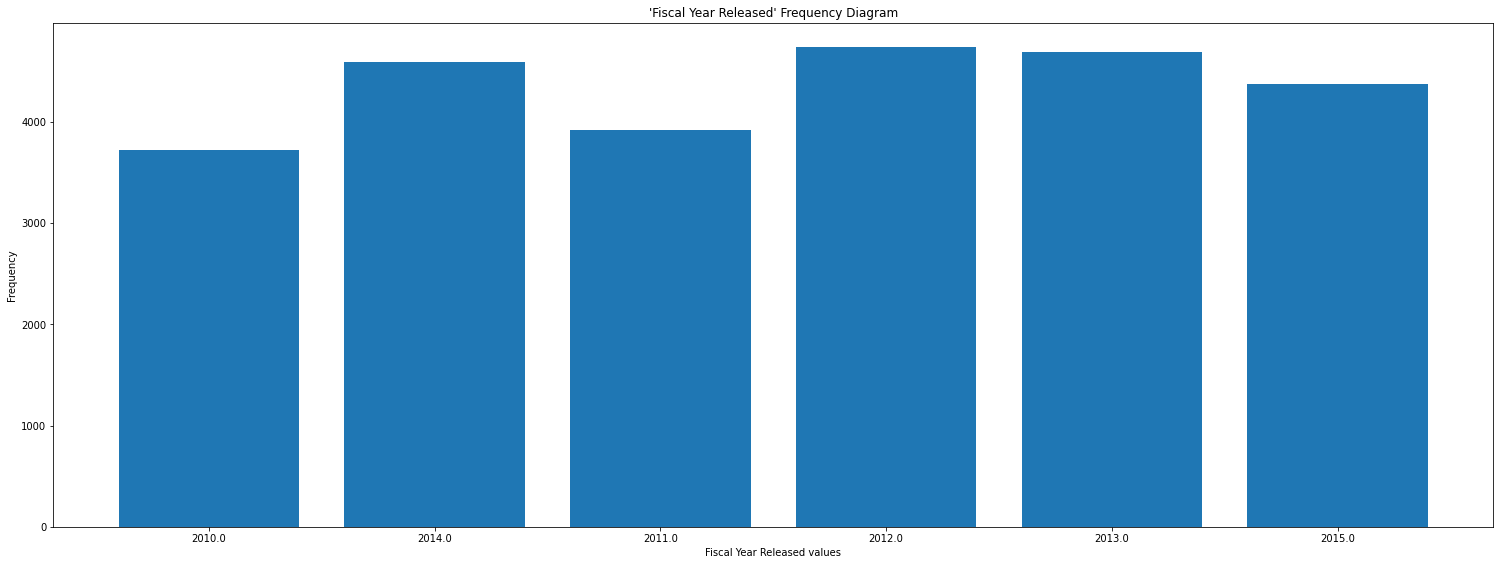

In [146]:
import plot_utils

column_name = "Fiscal Year Released"
attribute_frequencies = table.get_column_frequency(column_name, include_missing_values=True)
title = f"'{column_name}' Frequency Diagram"
x_label = f"{column_name} values"
y_label = "Frequency"
x_values = attribute_frequencies.keys()
y_values = attribute_frequencies.values()
plot_utils.create_frequency_diagram(x_values, y_values, title, x_label, y_label)

As we know the current state of affairs changes year to year. If a prisoner was released during the Covid years they may be more likely to return to prison. Even though our dataset doesn't go to the Covid times we still thought the date of release was important.

#### Figure 2: Release Type Frequency Diagram

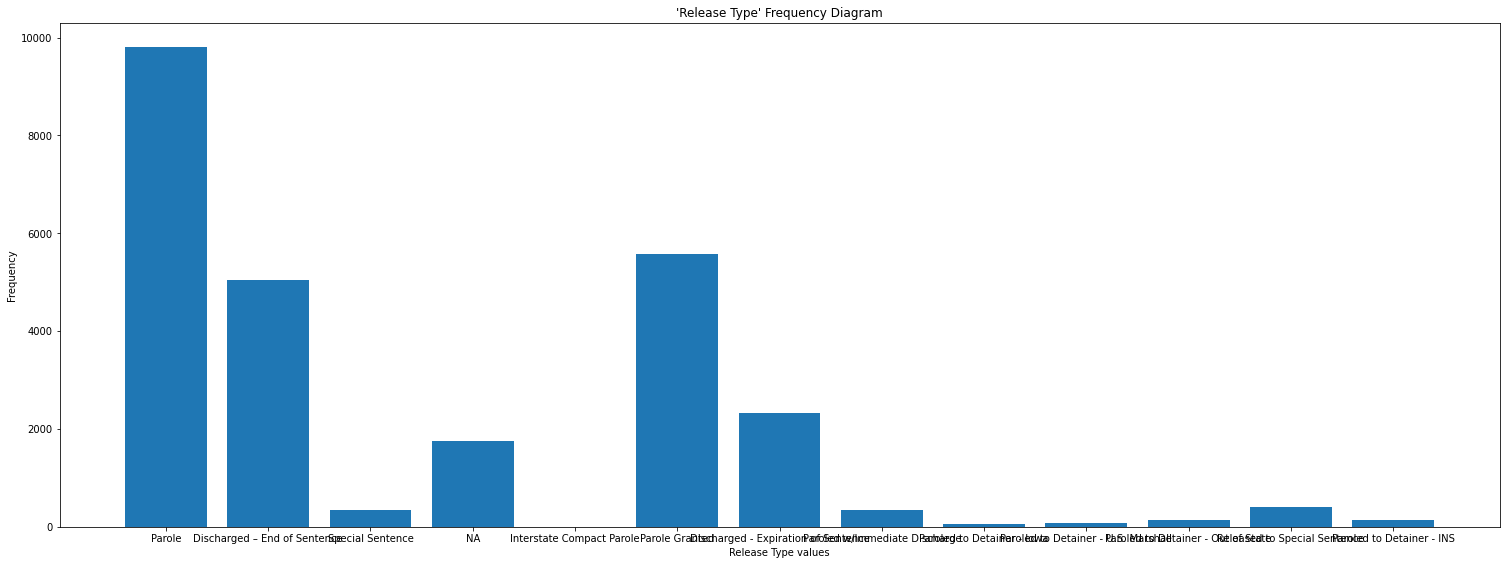

In [147]:
column_name = "Release Type"
attribute_frequencies = table.get_column_frequency(column_name, include_missing_values=True)
title = f"'{column_name}' Frequency Diagram"
x_label = f"{column_name} values"
y_label = "Frequency"
x_values = attribute_frequencies.keys()
y_values = attribute_frequencies.values()
plot_utils.create_frequency_diagram(x_values, y_values, title, x_label, y_label)

Understanding why they were released can help judge if they will return to prison. It is also interesting that most are released on parole and yet so many return to prison. It might be a sign that the parole board is not an apt method to judge prison release.

#### Figure 3: Return to prison frequency diagram

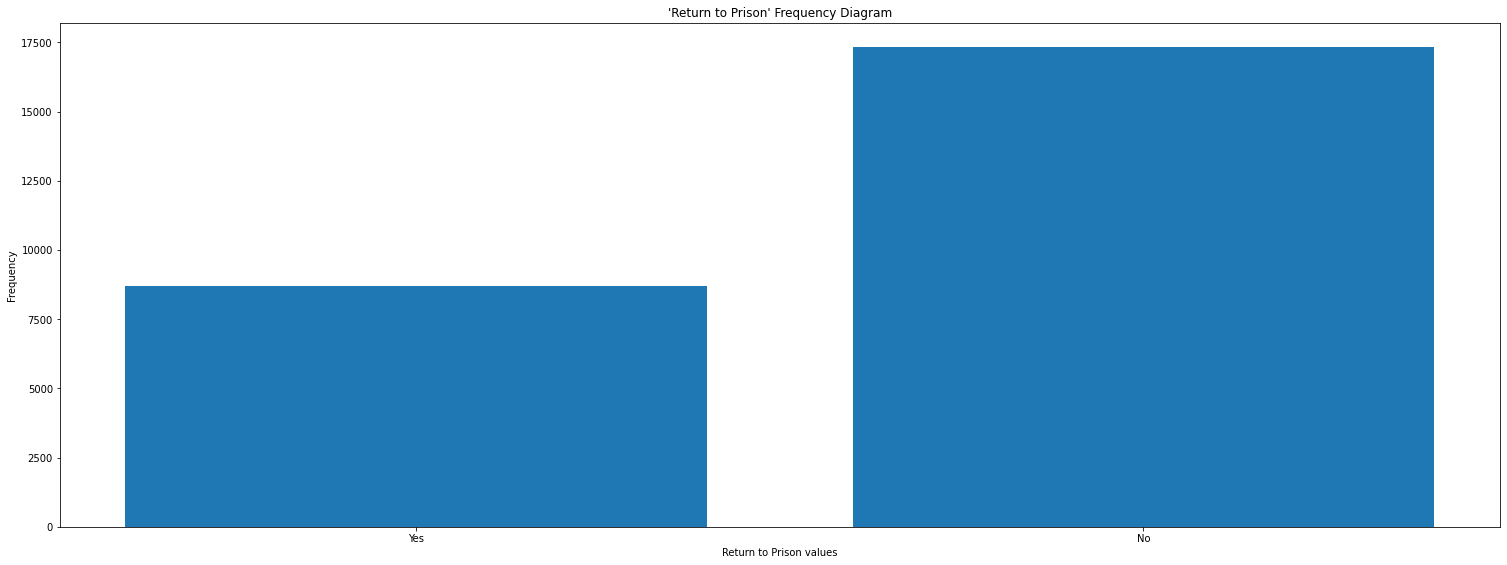

In [148]:
column_name = "Return to Prison"
attribute_frequencies = table.get_column_frequency(column_name, include_missing_values=True)
title = f"'{column_name}' Frequency Diagram"
x_label = f"{column_name} values"
y_label = "Frequency"
x_values = attribute_frequencies.keys()
y_values = attribute_frequencies.values()
plot_utils.create_frequency_diagram(x_values, y_values, title, x_label, y_label)

if our prediction was a dummy prediction it should predict no 100% of the time. If it was an average predictor it would predict yes around 30% of the time.

#### Figure 4: Age at release Historgram

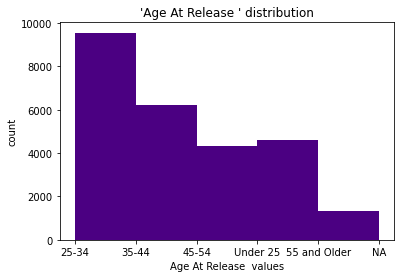

In [149]:
colors = ['black', 'lightcoral', 'darkorange', 'maroon', 'slategrey', 'indigo', 'cornflowerblue', 'turqoise']
from random import randrange
column_name = "Age At Release "
attributes = table.get_column(column_name, include_missing_values=True)
title = f"'{column_name}' distribution"
x_label = f"{column_name} values"
y_label = 'count'
rand_val = randrange(7)
color = colors[rand_val]
plot_utils.histogram_chart(attributes, title,x_label, y_label, color)

Is useful for understanding our prisoner population demographic. The majority of prisoners are between the ages of 25 and 44. Would be interesting to see if younger people are more likely to return to prison or older people.

#### Figure 5: Offense Type Historgram

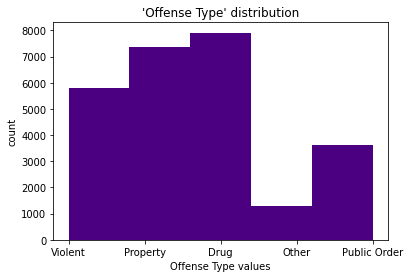

In [150]:
colors = ['black', 'lightcoral', 'darkorange', 'maroon', 'slategrey', 'indigo', 'cornflowerblue', 'turqoise']
from random import randrange
column_name = "Offense Type"
attributes = table.get_column(column_name, include_missing_values=True)
title = f"'{column_name}' distribution"
x_label = f"{column_name} values"
y_label = 'count'
rand_val = randrange(7)
color = colors[rand_val]
plot_utils.histogram_chart(attributes, title,x_label, y_label, color)

When Eric and I were initially looking at this dataset we assumed that prisoners who committed certain crimes would be more likely to return to prison. We assumed that more serious crimes ie. Violent, sexual crimes, were more likely to return.

#### Figure 6: Race (Ethnicity) Pie Chart

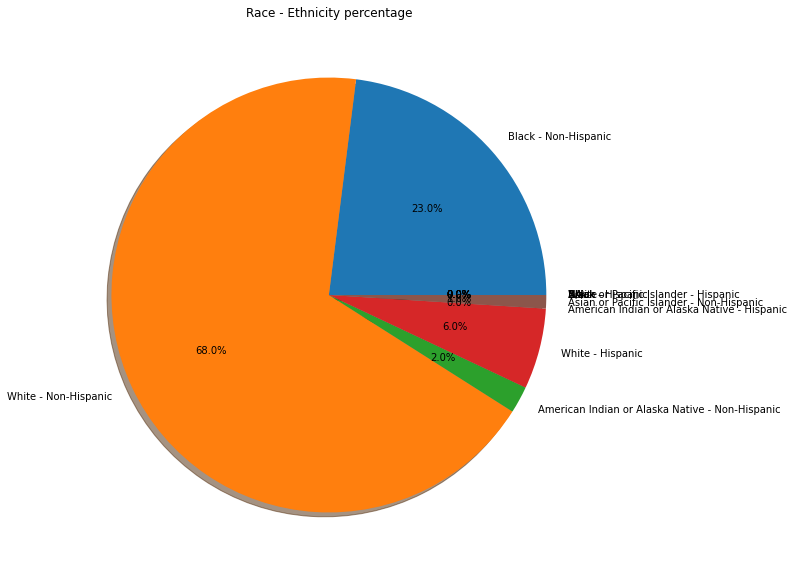

In [151]:
column_name = "Race - Ethnicity"
attributes = table.get_column(column_name, include_missing_values=True)
grouping, names = myutils.grouping(attributes)
try:
    plot_utils.pie_chart(grouping, names, column_name + " percentage")
except:
    pass

This pie chart is useful for understanding the different race demographics in the Iowa prisons. We also initally predicted that race would be a large factor in recidivism.

#### Figure 7: Sex Pie Chart

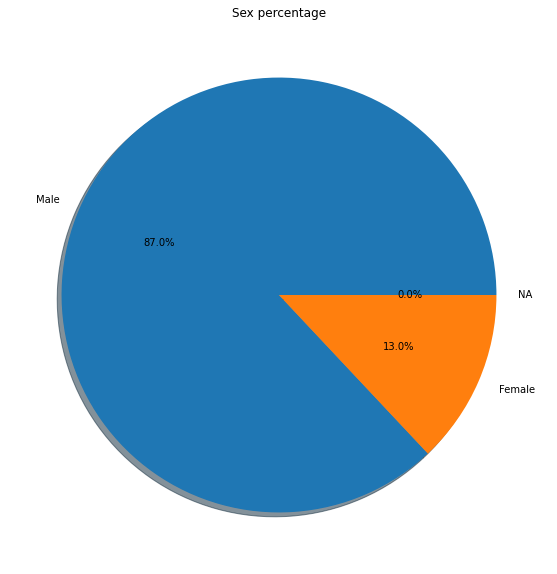

In [152]:
column_name = "Sex"
attributes = table.get_column(column_name, include_missing_values=True)
grouping, names = myutils.grouping(attributes)
try:
    plot_utils.pie_chart(grouping, names, column_name + " percentage")
except:
    pass

This last pie chart is useful for understanding the male to female ratio. Obviously, it is clear that there are many more males in the prisons then females. We also assumed that males would be more likely to return to prison then women.

## Classification

In [14]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyRandomForestClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyDummyClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import numpy as np
import tabulate

In [17]:
filename = os.path.join("data", "cleaned-recidivism-data-NA.csv")
table = myutils.get_table_with_file_data(filename)

x_table_data = [MyPyTable.get_partial_row(row, exclude_indices=[-1]) for row in table.data]
y_table_data = table.get_column("Return to Prison")

X_table = MyPyTable(column_names=table.column_names[:-1], data=x_table_data)
y_table = MyPyTable(column_names=table.column_names[-1:], data=y_table_data)

decision_tree_header_indices = [3, 4, 5, 8] # "Release Type", "Race - Ethnicity", "Age At Release ", "Offense Subtype"
k = 10
labels = ["Yes", "No"]
positive_label = "Yes"
confusion_matrix_header = ["Return To Prison"] + labels + ["Total", "Recognition (%)"]

np.random.seed(0)
X_train_1, X_test_1, y_train_1, y_test_1 = myutils.kfold_test_train_split(X_table.data, y_table.data, k, 0, False, stratified=True)

classifiers = [
    MyDummyClassifier(),
    MyNaiveBayesClassifier(),
    MyDecisionTreeClassifier(header=[column_name for i, column_name in enumerate(X_table.column_names) if i in decision_tree_header_indices]),
    MyRandomForestClassifier(5, 2, 4),
]

for classifier in classifiers:
    y_predicted = []
    if classifier.__class__.__name__ == "MyDecisionTreeClassifier":
        decision_tree_X_train = [[value for i, value in enumerate(row) if i in decision_tree_header_indices] for row in X_train_1]
        decision_tree_X_test = [[value for i, value in enumerate(row) if i in decision_tree_header_indices] for row in X_test_1]
        classifier.fit(decision_tree_X_train, y_train_1)
        y_predicted = classifier.predict(decision_tree_X_test)
    else:
        classifier.fit(X_train_1, y_train_1)
        y_predicted = classifier.predict(X_test_1)
    accuracy = myevaluation.accuracy_score(y_test_1, y_predicted)
    error_rate = 1 - accuracy
    precision = myevaluation.binary_precision_score(y_test_1, y_predicted, labels, positive_label)
    recall = myevaluation.binary_recall_score(y_test_1, y_predicted, labels, positive_label)
    f1_measure = myevaluation.binary_f1_score(y_test_1, y_predicted, labels, positive_label)
    confusion_matrix = myevaluation.confusion_matrix(y_test_1, y_predicted, labels)
    enhanced_confusion_matrix = myutils.enhance_confusion_matrix(confusion_matrix, labels)
    print(f"Evaluation metrics for {classifier.__class__.__name__}:")
    print(f"Accuracy: {accuracy}")
    print(f"Error Rate: {error_rate}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 measure: {f1_measure}")
    print(tabulate.tabulate(enhanced_confusion_matrix, headers=confusion_matrix_header) + "\n\n")


Evaluation metrics for MyDummyClassifier:
Accuracy: 0.6663463755861326
Error Rate: 0.33365362441386737
Precision: 0.0
Recall: 0.0
F1 measure: 0.0
Return To Prison      Yes     No    Total    Recognition (%)
------------------  -----  -----  -------  -----------------
Yes                     0   8681     8681                  0
No                      0  17337    17337                100


Evaluation metrics for MyNaiveBayesClassifier:
Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0
F1 measure: 1.0
Return To Prison      Yes     No    Total    Recognition (%)
------------------  -----  -----  -------  -----------------
Yes                  8681      0     8681                100
No                      0  17337    17337                100


Evaluation metrics for MyDecisionTreeClassifier:
Accuracy: 0.6681528172803444
Error Rate: 0.33184718271965563
Precision: 0.5591939546599496
Recall: 0.025573090657758323
F1 measure: 0.048909451421017845
Return To Prison      Yes     No    Tota

## Conclusion

#### Overall thoughts
1. The project was a nice conclusion of everything that we learned in this class. Eric and I essentially put together a complete study and prediction of an interesting dataset. It's fun to see how machine learning can help you make incites from a dataset that would otherwise be impossible.
1. The dataset was interesting, in that, the results of our prediction could be useful for understanding what causes prisoners to return back to prison. Even though nothing would likely be changed, it is useful to see what is wrong with the prison system in Iowa and why so many prisoners are returning back to prison. There is no reason that nearly 30% of prisoners are returning in 3 years, and likely more after that.
1. The dataset was not inherently difficult to mine. It originally had 17 attributes but we decided that some were useless and it would be difficult to mine with that many so we cut it down to 11. We also had to discretize a few attributes for the machine learning algorithms.
1. Approach used
    1. The approaches we used for classification in this project were Naive Bayes, Decision Trees, and Random Forest. The performance of these algorithms was....
1. Improvement
    1. I think it would be interesting to try out some other algorithms like linear regression, kmean clustering, or knn. It would have been far to complex and way to much work. But it would have been interesting to see how a neural network classifies the results of this datasets. However, the results of our classifiers was pretty successful.